#### Assignment 1
#### Name: Kunal Kalashi
#### Advanced Machine Learning

In [23]:
from tensorflow.keras.datasets import imdb
(imdb_train_data, imdb_train_labels), (imdb_test_data, imdb_test_labels) = imdb.load_data(
    num_words=10000)

In [24]:
imdb_train_labels[0]

1

In [25]:
max([max(sequence) for sequence in imdb_train_data])
###############################################################

9999

In [26]:
k_word_index = imdb.get_word_index()
k_reverse_word_index = dict(
    [(value, key) for (key, value) in k_word_index.items()])
decoded_review = " ".join(
    [k_reverse_word_index.get(i - 3, "?") for i in imdb_train_data[0]])
###############################################################

In [27]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
k_x_train = vectorize_sequences(imdb_train_data)
k_x_test = vectorize_sequences(imdb_test_data)

In [28]:
k_x_train[0]
###############################################################

array([0., 1., 1., ..., 0., 0., 0.])

In [29]:
k_y_train = np.asarray(imdb_train_labels).astype("float32")
k_y_test = np.asarray(imdb_test_labels).astype("float32")

In [30]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

In [31]:
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])
###############################################################

### Validating the approach

In [32]:
x_val = k_x_train[:10000]
partial_x_train = k_x_train[10000:]
y_val = k_y_train[:10000]
partial_y_train = k_y_train[10000:]

In [33]:
## model planned to train with 20 epoch with batch size of 256

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))

Epoch 1/20
59/59 [==============================] - 4s 56ms/step - loss: 0.1221 - accuracy: 0.8364 - val_loss: 0.0846 - val_accuracy: 0.8848
Epoch 2/20
59/59 [==============================] - 2s 28ms/step - loss: 0.0499 - accuracy: 0.9375 - val_loss: 0.0898 - val_accuracy: 0.8795
Epoch 3/20
59/59 [==============================] - 1s 23ms/step - loss: 0.0313 - accuracy: 0.9637 - val_loss: 0.0975 - val_accuracy: 0.8766
Epoch 4/20
59/59 [==============================] - 2s 28ms/step - loss: 0.0222 - accuracy: 0.9759 - val_loss: 0.1053 - val_accuracy: 0.8702
Epoch 5/20
59/59 [==============================] - 1s 23ms/step - loss: 0.0182 - accuracy: 0.9805 - val_loss: 0.1118 - val_accuracy: 0.8688
Epoch 6/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0167 - accuracy: 0.9823 - val_loss: 0.1162 - val_accuracy: 0.8656
Epoch 7/20
59/59 [==============================] - 2s 27ms/step - loss: 0.0171 - accuracy: 0.9807 - val_loss: 0.1177 - val_accuracy: 0.8652
Epoch 8/20
59

In [34]:
k_history_dict = history.history
k_history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plotting the train & Validation loss

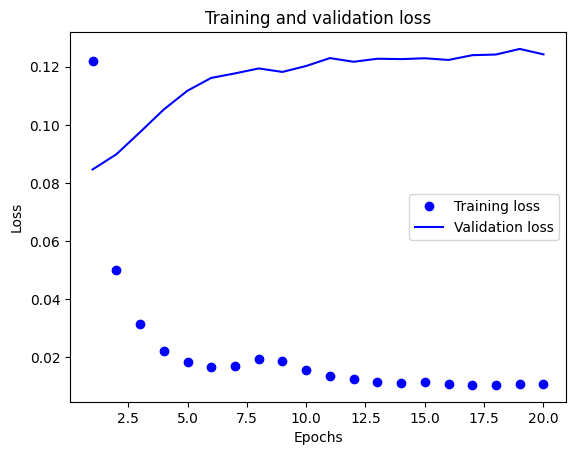

In [35]:
import matplotlib.pyplot as plt
k_history_dict = history.history
loss_values = k_history_dict["loss"]
val_loss_values = k_history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

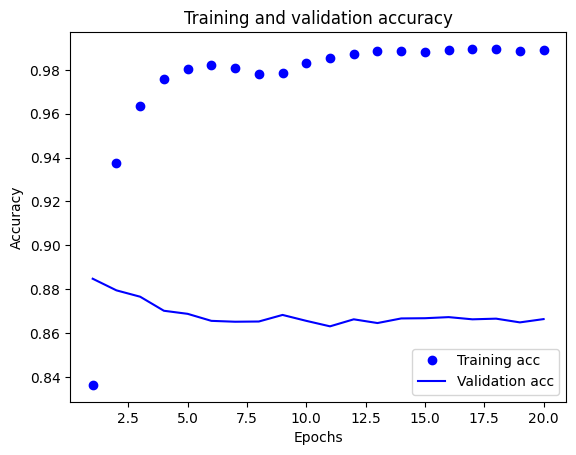

In [36]:
plt.clf()
acc = k_history_dict["accuracy"]
val_acc = k_history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
results = model.evaluate(k_x_test, k_y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.1418 - accuracy: 0.8479


In [38]:
results

[0.14180989563465118, 0.8479200005531311]

#### Combining all code together along with dropout layer

Epoch 1/20
59/59 [==============================] - 4s 49ms/step - loss: 1.5186 - accuracy: 0.7937 - val_loss: 1.1767 - val_accuracy: 0.8848
Epoch 2/20
59/59 [==============================] - 1s 25ms/step - loss: 0.9432 - accuracy: 0.9111 - val_loss: 0.7288 - val_accuracy: 0.8829
Epoch 3/20
59/59 [==============================] - 2s 32ms/step - loss: 0.5405 - accuracy: 0.9329 - val_loss: 0.4024 - val_accuracy: 0.8876
Epoch 4/20
59/59 [==============================] - 2s 29ms/step - loss: 0.2669 - accuracy: 0.9471 - val_loss: 0.2058 - val_accuracy: 0.8862
Epoch 5/20
59/59 [==============================] - 2s 35ms/step - loss: 0.1254 - accuracy: 0.9595 - val_loss: 0.1316 - val_accuracy: 0.8859
Epoch 6/20
59/59 [==============================] - 1s 22ms/step - loss: 0.0852 - accuracy: 0.9633 - val_loss: 0.1181 - val_accuracy: 0.8852
Epoch 7/20
59/59 [==============================] - 1s 24ms/step - loss: 0.0707 - accuracy: 0.9692 - val_loss: 0.1144 - val_accuracy: 0.8851
Epoch 8/20
59

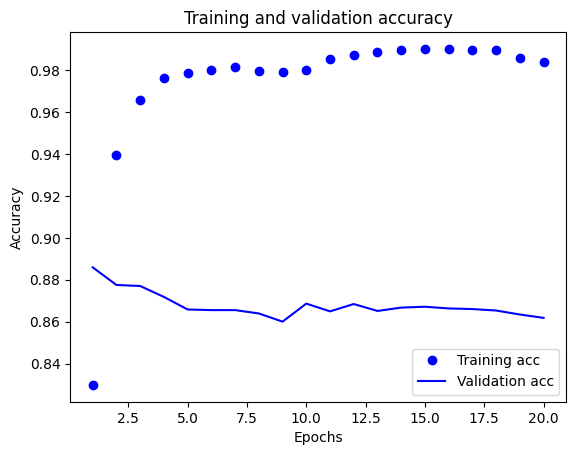

782/782 [==============================] - 2s 2ms/step - loss: 0.1252 - accuracy: 0.8600


[0.12521857023239136, 0.8600000143051147]

In [22]:
## Libraries required for setting up an environment

#####################################
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras import regularizers
#####################################

# Neural network implementation using 3 layered approach with a single dropout layer
#######################################
model = keras.Sequential()
model.add(Dense(32,activation='tanh'))
model.add(Dropout(0.5))
#kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01))
model.add(Dense(32,activation='tanh',kernel_regularizer=regularizers.L1(0.01), activity_regularizer=regularizers.L2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32,activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
########################################

# Here for compilation we used optimizer "adagrad", mean squared error loss and accuracy metrics
########################################
model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["accuracy"])
########################################

## splitting the data
#######################################
x_val = k_x_train[:10000]
partial_x_train = k_x_train[10000:]
y_val = k_y_train[:10000]
partial_y_train = k_y_train[10000:]
#######################################

# Train a neural network
#####################################################
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
#####################################################

# plotting the Training and Validation accuracy
####################################################
plt.clf()
acc = k_history_dict["accuracy"]
val_acc = k_history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
####################################################


# Evaluating the results
results = model.evaluate(k_x_test, k_y_test)
results


#### Summary about the three-layered neural network for IMDB data:
•	Initially we gathered required libraries for our neural network to be on track. During my study and little research, I can infer that TensorFlow has good support and implementation among other deep learning libraries like pytorch.

List of Imports are:

from tensorflow import keras  
from tensorflow.keras import layers
from keras.layers import Dense
from keras.layers import Dropout

•	we import keras, keras.layers, Dense and Dropouts. Each of them individually is really significant in its implementation process. Keras is the high-level API of TensorFlow 2: a simple, powerful to use interface for solving machine learning problems, with the major focus on modern deep learning.  The main data structures of Keras are layers and models. The most basic kind of model is the Sequential type, which is a linear stack of layers. Dense represent the number of hidden units in the neural network.  Dropout: The meaning of dropout is the removal of connections between the inputs in a bunch or hidden layer input. Now we are going to focus on designing the neural network layers. model = keras.Sequential() # Sequential model is the simplest mode of keras, which is stack up the layers in the sequences. model.add(Dense(32,activation='tanh')) You can stack layers easily by using the.add function. Furthermore, 32 is the number of the hidden units and the activation function is tanh. As the next topic, I will introduce what is in the neural network.
1.	Input layer -- where we provide our input to it. – here we provide vector representation of IMDB data
2.	Hidden layers – it contains the number of dense units, and we can stack up as many layers as we want depending on the requirement.
3.	Output layer – output layer, Preferably the output layer has 1 dense unit.
Here in this task I tried to implement three layered approach as per the requirement given in the assignment.
   model = keras.Sequential([
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

The above code model initialized as sequential. And we stack up three layers with 32 dense units and tanh activation function. In the task, I implemented tanh instead of relu as suggested in the assignment.
model.compile(optimizer="adagrad", loss="mean_squared_error", metrics=["accuracy"])
The above piece of code uses an optimizer adagrad with mse loss. I still have a doubt here initially IMBD data uses a loss of binary_crossentrophy which is a probabilistic loss and what if we changed the regression loss. More information will be available in 2nd reference link.
Optimizers are very important to minimize the error and we have different techniques/optimizers. For example, adam is considered as good optimizers among the different approaches. In this task, I used adagrad. More details about optimizers will be explained in the 3nd reference link.
	We split the data into training and validation part and the code below shows the split

x_val = k_x_train[:10000]
partial_x_train = k_x_train[10000:]
y_val = k_y_train[:10000]
partial_y_train = k_y_train[10000:]
Training the data
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=256,
                    validation_data=(x_val, y_val))
The above line of code represent it will train the neural network with 20 epoch and batch size of 256 and parallely it compare with validation data.
I used L1 and L2 regularizers but it does not gives much impact on the total validation accuracy.


   

        
Reference:
1.	https://keras.io/about
2.	https://keras.io/api/losses/
3.	https://keras.io/api/optimizers/


## Conclusions

##### 1. neural network designed with  3 layers
##### 2. Activation functions tanh is used instead of relu
##### 3. Optimizer adam is used instead of rmsprop
##### 4. L1 & L2 regularizers are used
##### 4. Dropout layer with 0.5 is used. That means we are dropping 50 percent of inputs during the training.

### Final accuracy of 99.19 and validation accuracy of 86.9 is achieved using the above changes..

